# 1. 카메라 스티커앱 만들기 첫걸음

## 1-1. 카메라 스티커앱 만들기 첫걸음

### 일단 한 번 만들어보자!
---
스마트폰 시대에 모두가 가지고 있는 얼굴인식 카메라앱! 사용해보셨나요?

저도 부모님, 친구들, 연인과 함께 즐겁게 사용하고 있습니다. 컴퓨터 비전 기술로 사람들에게 즐거움을 줄 수 있다는 사실은 언제나 열정을 샘솟게 하는 것 같습니다.
이번 코스에서는 얼굴인식 카메라앱을 따라 만들어 보겠습니다.

이번 코스를 통해

1. 카메라앱 만들기를 통해 동영상 처리, 검출, 키포인트 추정, 추적, 카메라 원근의 기술을 다룹니다.
2. 간단한 스티커부터 시작해서 각도 변화가 가능하고 거리 변화에 강건한 스티커까지 만들 수 있습니다.
---
이번 시간의 목표는 "일단 한번 만들어 보자" 입니다.

오늘은 직접 사진 한 장을 찍고 머리에 왕관 씌워 보는 것 까지 다루겠습니다.

### 학습 목표
---
- 얼굴인식 카메라의 흐름을 이해합니다.
- dlib 라이브러리 사용하여 실습해봅니다.
- 이미지 배열의 인덱싱 예외 처리를 익힙니다.

### 학습 내용
---
- 어떻게 만들까? 사진 준비하기
- OpenCV 라이브러리를 통해 실습을 준비합니다.
- 얼굴 검출 face detection
- face detection 실습을 해봅니다.
- 얼굴 랜드마크 face landmark
- 이미지에 face landmark를 적용합니다.
- 스티커 적용하기
- 스티커 적용하기를 통해 어플의 초기 버전을 완성합니다.

### 준비물
---
오늘 사용할 왕관 이미지입니다.

아래의 이미지는 png(Portable Network Graphics) 파일로, 무손실 압축을 사용하기 때문에 이미지 손실이 없고 고품질 이미지를 생성하여 이미지 편집에 많이 사용되는 파일입니다. png 파일은 배경이 투명해서 배경 이미지 위에 png 파일을 얹어 두 이미지를 자연스럽게 합성시킬 수 있습니다.

아래의 이미지에서는 보이지 않지만 이미지 파일을 다운로드하여 확인해보면 배경이 체커판 패턴으로 보이는데, 이 부분이 투명한 부분입니다. jpeg 등과 같은 다른 이미지 파일을 사용하면 배경을 지우는 등의 추가 처리가 필요하므로 배경이 없는 png 파일을 사용하는 것이 훨씬 빠르고 간편합니다. 그러므로 만약 다른 이미지를 스티커로 사용하고 싶다면 png 파일을 사용하는 것이 좋습니다.



## 1-2. 어떻게 만들까? 사진 준비하기
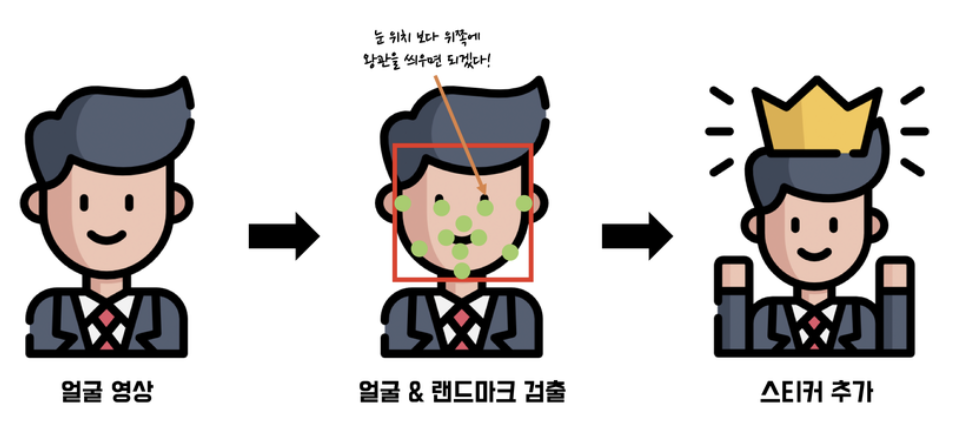

스티커를 세밀하고 자연스럽게 적용하기 위해서 눈, 코, 입, 귀와 같은 얼굴 각각의 위치를 아는 것이 중요합니다.
 이 위치들을 찾아내는 기술을 **랜드마크 landmark** 또는 **조정 alignment** 이라고 합니다. 조금 더 큰 범위로는 keypoint detection 이라고 부르고 있습니다. 대부분의 face landmark 데이터셋은 눈, 코, 입과 턱을 포함하고 있습니다.
 얼굴의 랜드마크를 찾아냈다면 머리의 위치를 예상하는 것은 쉽습니다. 눈과 코의 위치로부터 위로 떨어져 있는 정도를 데이터로부터 유추할 수 있을 겁니다.

따라서 우리는,

1. 얼굴이 포함된 사진을 준비하고
2. 사진으로부터 얼굴 영역 face landmark 를 찾아냅니다.
    (landmark를 찾기 위해서는 얼굴의 bounding box를 먼저 찾아야합니다.)
3. 찾아진 영역으로 부터 머리에 왕관 스티커를 붙여넣겠습니다.